In [473]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as p
import pandas as pd
import os

In [75]:
#download data, only need to run one time
folder = 'https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/'
cleaned_hm = pd.read_csv(folder+'cleaned_hm.csv', sep = ",",on_bad_lines='skip')
demographic_df = pd.read_csv(folder+'demographic.csv', sep = ",",on_bad_lines='skip')

data_path=os.path.join(os.getcwd(), '..', 'data/')
cleaned_hm.to_csv(data_path+"cleaned_hm.csv")
demographic_df.to_csv(data_path+"demographic.csv")
topic_list=["entertainment","exercise","family","food","people","pets","school","shopping","work"]
for topic in topic_list:
    df = pd.read_csv(folder+"/topic_dict/"+topic+"-dict.csv", sep = ",",on_bad_lines='skip')
    df.to_csv(data_path+topic+".csv")

In [454]:
# read data
data_path=os.path.join(os.getcwd(), '..', 'data/')
cleaned_hm=pd.read_csv(data_path+"cleaned_hm.csv")
demographic_df=pd.read_csv(data_path+"demographic.csv")
topic_list=["entertainment","exercise","family","food","people","pets","school","shopping","work"]
#topic_list=["school"]
keywords=[]
for topic in topic_list:
    df = pd.read_csv(data_path+topic+".csv", index_col=0)
    keywords.extend(df[df.columns[0]].to_list())

In [455]:
demographic=demographic_df.copy()
demographic=demographic[demographic['age'].notna()]
demographic=demographic[demographic["age"].str.match(r'^[0-9]+(\.[0-9]+)?$')]
demographic["age"]=demographic["age"].astype(float)

In [456]:
import os
processed_moments_folder = os.path.join(os.getcwd(), '..', 'output/')
processed_moments_df=pd.read_csv(processed_moments_folder+'processed_moments.csv')
processed_moments_df=processed_moments_df.merge(demographic_df,on="wid")

In [472]:
df=processed_moments_df[["text","age"]].copy().dropna()
df["text"]=df["text"].apply(lambda x:x.split(" ") if isinstance(x, str) else [])
df=df[df["age"].str.match(r'^[0-9]+(\.[0-9]+)?$')]
df["age"]=df["age"].astype(float)
df_age_less=df[df["age"]<25]
df_age_more=df[df["age"]>=35]

exploded_df = df_age_less.explode('text')

keywords_appearance=exploded_df['text'].value_counts()
keywords_less=keywords_appearance.reindex(keywords).fillna(0)
age_less=keywords_less/len(exploded_df)


exploded_df = df_age_more.explode('text')
keywords_appearance=exploded_df['text'].value_counts()
keywords_more=keywords_appearance.reindex(keywords).fillna(0)
age_more=keywords_more/len(exploded_df)

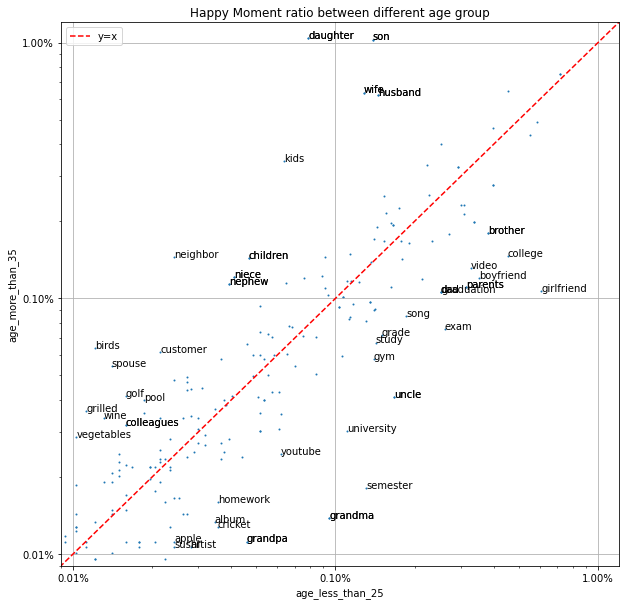

In [468]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.figure(figsize=(10, 10))
plt.scatter(age_less, age_more,marker='o',s=1)
plt.plot([0,0.12], [0,0.12], color='red', linestyle='--', label='y=x')


for i, txt in enumerate(age_less.index):
    x=age_less.values[i]
    y=age_more.values[i]
    if(txt in keywords and x>0.0001 and y>0.0001 and (x/y>2 or y/x>2)):
        plt.text(x, y, txt,fontsize=10)
plt.title('Happy Moment ratio between different age group')
plt.xlabel('age_less_than_25')
plt.ylabel('age_more_than_35')
plt.xlim(0.00009,0.012)
plt.ylim(0.00009,0.012)
plt.xscale('log')
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(PercentFormatter(1,decimals=2))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1,decimals=2))
plt.grid(True)
plt.legend()
plt.savefig('../figs/happy_moment_ratio.png')

In [448]:
topic_list=["school"]
school=[]
for topic in topic_list:
    df = pd.read_csv(data_path+topic+".csv", index_col=0)
    school.extend(df[df.columns[0]].to_list())

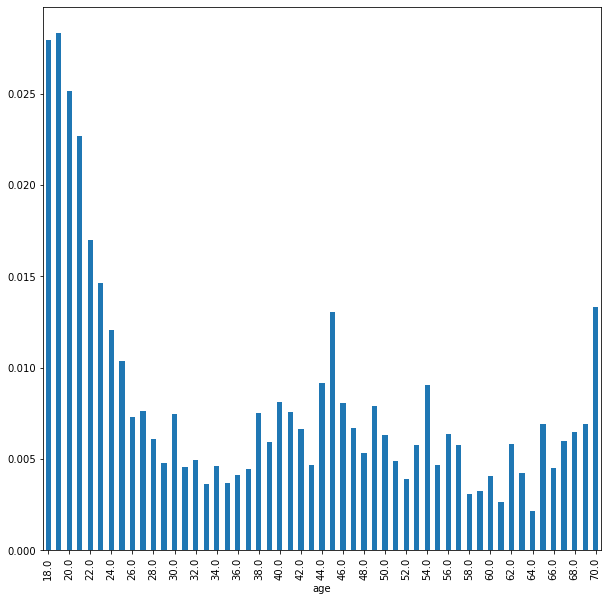

In [475]:
def calculate_topic_ratio(age,topic):
    df_age=age.copy()
    exploded_df=df_age.explode('text')
    topic_match_count=exploded_df["text"].value_counts().reindex(topic).fillna(0).sum()
    age_ratio=topic_match_count/len(exploded_df)
    return age_ratio

df=processed_moments_df[["text","age"]].copy().dropna()
df["text"]=df["text"].apply(lambda x:x.split(" ") if isinstance(x, str) else [])
df=df[df["age"].str.match(r'^[0-9]+(\.[0-9]+)?$')]
df["age"]=df["age"].astype(float)
df=df[(df["age"]>=18)&(df["age"]<=70)]
age_group=df.groupby("age")
ratio=age_group.apply(lambda x:calculate_topic_ratio(x,school))

plt.figure(figsize=(10, 10))
ratio.plot(kind='bar')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))
plt.savefig('../figs/happy_moments_school_different_age.png')

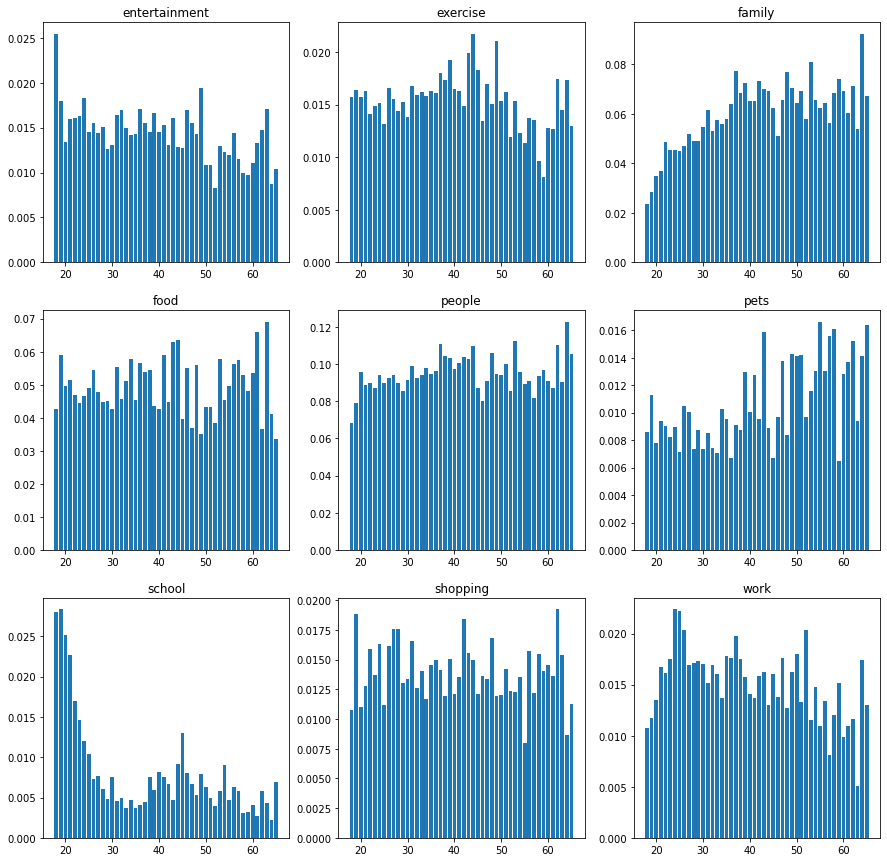

In [478]:
topic_list=["entertainment","exercise","family","food","people","pets","school","shopping","work"]
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

age=processed_moments_df[["text","age"]].copy().dropna()
age["text"]=age["text"].apply(lambda x:x.split(" ") if isinstance(x, str) else [])
age=age[age["age"].str.match(r'^[0-9]+(\.[0-9]+)?$')]
age["age"]=age["age"].astype(float)
age=age[(age["age"]>=18)&(age["age"]<=65)]
age_group=age.groupby("age")


for i in range(9):
    df = pd.read_csv(data_path+topic_list[i]+".csv", index_col=0)
    topic=df[df.columns[0]].to_list()
    ratio=age_group.apply(lambda x:calculate_topic_ratio(x,topic))
    axes[i//3][i%3].bar(ratio.index, ratio.values, label=topic_list[i])
    axes[i//3][i%3].set_title(topic_list[i])
    ax = axes[i//3][i%3]
    ax.xaxis.set_major_locator(MultipleLocator(10))
plt.savefig('../figs/happy_moments_all_topic.png')